# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.014165999999999979
Average number of iterations is 288.213.


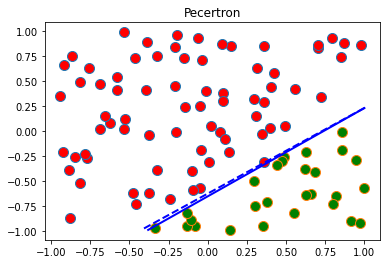

In [2]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
total_iters = 0
nTest = 1000 # number of test data
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    y_ = np.sign(w_g[1:].T @ X + w_g[0])
    J_train = np.sum(y != y_) / nTrain
    E_train += J_train
    X_test = np.random.random((2, nTest)) * 2 - 1
    y_test = np.sign(w_f[1:].T @ X_test + w_f[0])
    y__test = np.sign(w_g[1:].T @ X_test + w_g[0])
    J_test = np.sum(y_test != y__test) / nTest
    E_test += J_test
    # Sum up number of iterations
    total_iters += iters

E_train /= nRep
E_test /= nRep
avgIter = total_iters / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

In [145]:
nRep = 1 # number of replicates
nTrain = 100 # number of training data
total_iters = 0
nTest = 1000 # number of test data
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    y_ = w_g[1:].T @ X + w_g[0]
    J_train = -np.sum(y * y_)
    E_train += J_train
    X_test = np.random.random((2, nTest)) * 2 - 1
    y_test = w_f[1:].T @ X_test + w_f[0]
    y__test = w_g[1:].T @ X_test + w_g[0]
    J_test = -np.sum(y_test * y__test)
    E_test += J_test
    # Sum up number of iterations
    total_iters += iters

E_train /= nRep
E_test /= nRep
avgIter = total_iters / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


NameError: name 'perceptron' is not defined

### Part3: Linear Regression

E_train is 0.032999999999999995, E_test is 0.0396


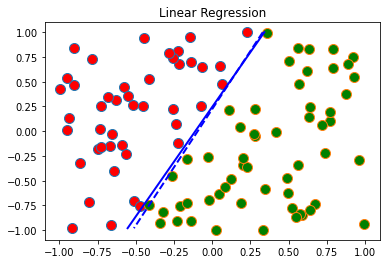

In [4]:
from linear_regression import LinearRegression, linear_regression


nRep = 10  # number of replicates
nTrain = 100 # number of training data
nTest = 1000
E_train, E_test = 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    # Compute training, testing error
    y_ = np.sign(w_g[1:].T @ X + w_g[0])
    J_train = np.sum(y != y_) / nTrain
    E_train += J_train
    X_test = np.random.random((2, nTest)) * 2 - 1
    y_test = np.sign(w_f[1:].T @ X_test + w_f[0])
    y__test = np.sign(w_g[1:].T @ X_test + w_g[0])
    J_test = np.sum(y_test != y__test) / nTest
    E_test += J_test
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');

E_train is 0.13100000000000003, E_test is 0.0558


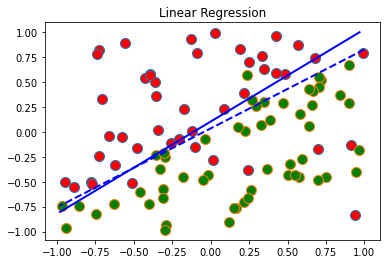

In [7]:
from linear_regression import LinearRegression, linear_regression


nRep = 10  # number of replicates
nTrain = 100 # number of training data
nTest = 1000
E_train, E_test = 0, 0
J_train_max, J_test_max = 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y)
    # Compute training, testing error
    y_ = np.sign(w_g[1:].T @ X + w_g[0])
    J_train = np.sum(y != y_) / nTrain
    E_train += J_train
    X_test = np.random.random((2, nTest)) * 2 - 1
    y_test = np.sign(w_f[1:].T @ X_test + w_f[0])
    y__test = np.sign(w_g[1:].T @ X_test + w_g[0])
    J_test = np.sum(y_test != y__test) / nTest
    E_test += J_test
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');
# plotdata(X, y, w_f, clf.W[:,1], 'Linear Regression');

## Part5: Linear Regression: poly_fit

In [ ]:
from linear_regression import LinearRegression
import scipy
import scipy.io


data_train = scipy.io.loadmat('poly_train.mat')
X_train, y_train = data_train['X'], data_train['y']
data_test = scipy.io.loadmat('poly_test.mat')
X_test, y_test = data_test['X_test'], data_test['y_test']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

clf = LinearRegression()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
error_train = np.average(y_train != pred_train)
pred_test = clf.predict(X_test)
error_test = np.average(y_test != pred_test)
print(error_train, error_test)

def data_transformation(X):
    X = np.vstack((X, X[0]*X[1]))
    X = np.vstack((X, X[0]**2))
    X = np.vstack((X, X[1]**2))
    return X
X_train, X_test = data_transformation(X_train), data_transformation(X_test)
clf = LinearRegression()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
error_train = np.average(y_train != pred_train)
pred_test = clf.predict(X_test)
error_test = np.average(y_test != pred_test)
print(error_train, error_test)

## Part6: Logistic Regression

E_train is 0.07524000000000007, E_test is 0.08548180000000002


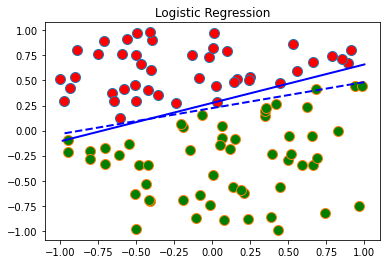

In [16]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000 # number of test data
E_train, E_test = 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    y[y==-1] = 0
    w_g = logistic(X, y)
    y[y==0] = -1
    # Compute training, testing error
    y_ = np.sign(w_g[1:].T @ X + w_g[0])
    J_train = np.sum(y != y_) / nTrain
    E_train += J_train
    X_test = np.random.random((2, nTest)) * 2 - 1
    y_test = np.sign(w_f[1:].T @ X_test + w_f[0])
    y__test = np.sign(w_g[1:].T @ X_test + w_g[0])
    J_test = np.sum(y_test != y__test) / nTest
    E_test += J_test
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.17100999999999972, E_test is 0.10842979999999999


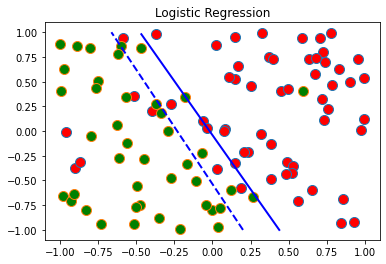

In [17]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000 # number of test data
E_train, E_test = 0, 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    y[y==-1] = 0
    w_g = logistic(X, y)
    y[y==0] = -1
    # Compute training, testing error
    y_ = np.sign(w_g[1:].T @ X + w_g[0])
    J_train = np.sum(y != y_) / nTrain
    E_train += J_train
    X_test = np.random.random((2, nTest)) * 2 - 1
    y_test = np.sign(w_f[1:].T @ X_test + w_f[0])
    y__test = np.sign(w_g[1:].T @ X_test + w_g[0])
    J_test = np.sum(y_test != y__test) / nTest
    E_test += J_test
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part8: SVM

E_train is 0.0, E_test is 0.03217999999999999
2.87


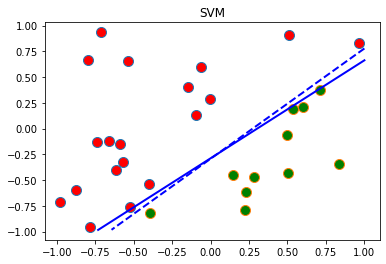

In [19]:
from svm import svm

nRep = 100 # number of replicates
nTrain = 30 # number of training data
nTest = 10000 # number of test data
E_train, E_test = 0, 0
total_num_sc = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    total_num_sc += num_sc
    # Compute training, testing error
    y_ = np.sign(w_g[1:].T @ X + w_g[0])
    J_train = np.sum(y != y_) / nTrain
    E_train += J_train
    X_test = np.random.random((2, nTest)) * 2 - 1
    y_test = np.sign(w_f[1:].T @ X_test + w_f[0])
    y__test = np.sign(w_g[1:].T @ X_test + w_g[0])
    J_test = np.sum(y_test != y__test) / nTest
    E_test += J_test
E_train /= nRep
E_test /= nRep
avg_num_sc = total_num_sc / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print(avg_num_sc)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

E_train is 0.4745000000000001, E_test is 0.47641699999999987
100.0


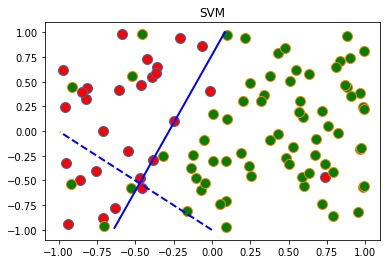

In [22]:
from svm import svm

nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 10000 # number of test data
E_train, E_test = 0, 0
total_num_sc = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g, num_sc = svm(X, y, c=0)
    total_num_sc += num_sc
    # Compute training, testing error
    y_ = np.sign(w_g[1:].T @ X + w_g[0])
    J_train = np.sum(y != y_) / nTrain
    E_train += J_train
    X_test = np.random.random((2, nTest)) * 2 - 1
    y_test = np.sign(w_f[1:].T @ X_test + w_f[0])
    # idx = np.random.choice(nTest, nTest//10)
    # y_test[0, idx] = -y_test[0, idx]
    y__test = np.sign(w_g[1:].T @ X_test + w_g[0])
    J_test = np.sum(y_test != y__test) / nTest
    E_test += J_test
E_train /= nRep
E_test /= nRep
avg_num_sc = total_num_sc / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print(avg_num_sc)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')